In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
from datetime import datetime 
from datetime import date
import holidays

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Asimetría de los datos
from scipy.stats import kstest
from scipy.stats import kurtosistest

# Errores
import warnings
warnings.filterwarnings('ignore')

## EXPLORACIÓN INICIAL

In [2]:
df = pd.read_csv('../datos/bikes.csv', index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [6]:
df.describe(include = 'object').T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


- Nulos

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Duplicados

In [8]:
df.duplicated().sum()

0

In [9]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head(2)

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


- Outliers

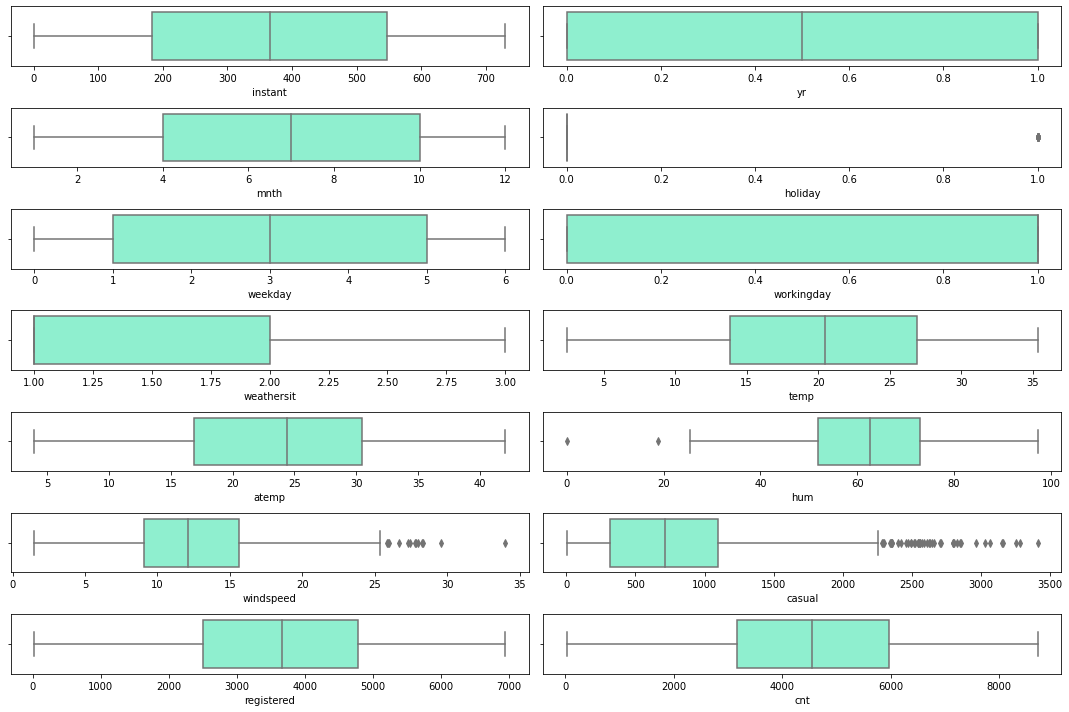

In [10]:
fig, axes = plt.subplots(7, 2, figsize = (15,10))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax = axes[indice], color = "aquamarine")
 
plt.tight_layout()
plt.show();

Vemos que hay muchas falsas numéricas, por lo que tenemos que categorizar.

### Renombramos columnas

In [11]:
columnas = {'instant': 'registro', 'dteday': 'fecha', 'season': 'estacion', 'yr': 'año', 'mnth': 'mes', 'holiday': 'festivo',   
            'weekday': 'dia_semana', 'workingday': 'dias_laborables', 'weathersit': 'tiempo', 'temp': 'temperatura', 
            'atemp': 'sensacion_termica', 'hum': 'humedad', 'windspeed': 'velocidad_viento', 'casual': 'usuarios_casuales', 'registered': 'usuarios_registrados', 'cnt': 'total_usuarios' }

df.rename(columns = columnas, inplace = True)
df.head(0)

,registro,fecha,estacion,año,mes,festivo,dia_semana,dias_laborables,tiempo,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total_usuarios


### Modificamos el tipo de las columnas

In [12]:
# Modificamos el tipo de la columna 'dteday' al tipo correcto
df['fecha'] = pd.to_datetime(df['fecha'], format = '%d-%m-%Y')

In [13]:
df.dtypes

registro                         int64
fecha                   datetime64[ns]
estacion                        object
año                              int64
mes                              int64
festivo                          int64
dia_semana                       int64
dias_laborables                  int64
tiempo                           int64
temperatura                    float64
sensacion_termica              float64
humedad                        float64
velocidad_viento               float64
usuarios_casuales                int64
usuarios_registrados             int64
total_usuarios                   int64
dtype: object

## LIMPIEZA

- Columna años

In [14]:
dicc_años = {0: 2018, 1:2019}
df['año'] = df['año'].map(dicc_años)

- Columna mes

In [15]:
dicc_mes = { 1: 'Enero',  2:'Febrero',  3:'Marzo',  4:'Abril',  5:'Mayo',  6:'Junio',  7:'Julio',  8:'Agosto',  9:'Septiembre',
            10:'Octubre', 11:'Noviembre', 12:'Diciembre' }

df['mes'] = df['mes'].map(dicc_mes)

- Columna dia_semana

In [16]:
df['dia_semana'] = df['fecha'].dt.day_name()

In [17]:
dicc_day = {'Monday':'Lunes', 'Thursday':'Jueves', 'Sunday':'Sabado', 'Tuesday':'Martes', 'Friday':'Viernes', 'Wednesday':'Miercoles',
       'Saturday':'Domingo'}

df['dia_semana'] = df['dia_semana'].map(dicc_day)

- Columna estaciones

Observamos que las estaciones no corresponden con la fecha que aparece, ya que Washington está en el hemisferio Norte y las estaciones que aparecían en nuestro DataFrame correspondían al hemisferio Sur. Por tanto, las modificamos.

In [18]:
dicc_estacion = {'spring': 'invierno', 'summer':'primavera', 'autumn':'verano', 'winter':'otoño'}

df['estacion'] = df['estacion'].map(dicc_estacion)

In [19]:
wa_holidays = holidays.US()

In [20]:
def categoria_festivo(elemento):
    """
   Esta función devuelve un si o un no dependiendo de si la fecha es festivo o no en Washington.
   Args: 
        elemento(datetime): fecha la cual queremos saber si fue festivo o no.
   Returns: devuelve un si o un no.
    """ 
    if elemento in wa_holidays:
        return 'si'
    
    else:
        return 'no'

In [21]:
df['festivo'] = df['fecha'].apply(categoria_festivo)

- Columna dias_laborables

In [22]:
def dias_laborables_festivos(dia_sem,dia_fest):
    """
    Esta función devuelve si el día es festivo, laborable o fin de semana.
    Args:
        dia_sem (str): día de la semana.
        dia_fest (str): si es festivo o no.
    Returns: devuelve si es festivo, laborable o fin de semana.
    """
    if dia_fest == 'si':
        return 'festivo'
    else:
        if dia_sem in ['Sabado', 'Domingo']:
            return 'fin de semana'
        else:
            return 'laborable'

In [23]:
df['dias_laborables'] = df.apply(lambda x: dias_laborables_festivos(x['dia_semana'],x['festivo']),axis=1)

- Columna tiempo

In [24]:
dicc_tiempo = {1: 'despejado', 2: 'nuboso', 3:'lluvioso'}

df['tiempo'] = df['tiempo'].map(dicc_tiempo)

In [25]:
df.drop('festivo', axis=1, inplace=True)

### Guardamos el archivo limpio para visualización

In [26]:
df.to_pickle('../datos_finales/archivo_limpio.pkl')
df.to_csv('../datos_finales/archivo_limpio.csv')

### Outliers

In [27]:
df_numericas = df.select_dtypes(include = np.number).drop(['registro','año'],axis=1)
df_numericas.head(2)

,temperatura,sensacion_termica,humedad,velocidad_viento,usuarios_casuales,usuarios_registrados,total_usuarios
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


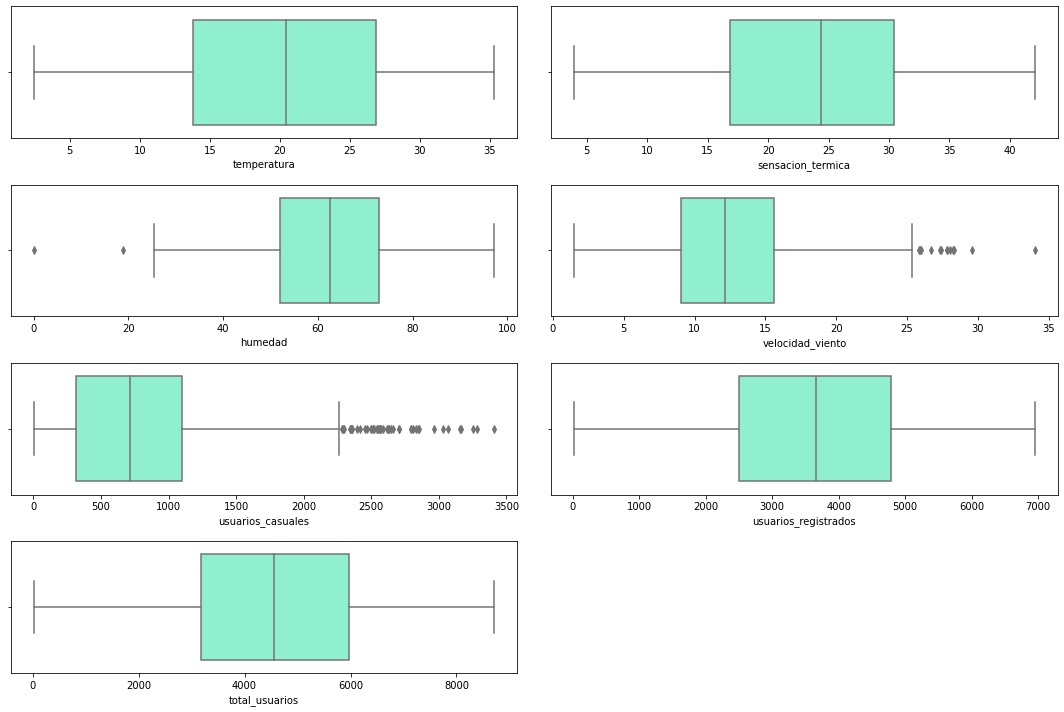

In [28]:
fig, axes = plt.subplots(4, 2, figsize = (15,10))

axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data = df, ax = axes[indice], color = "aquamarine")
 
plt.tight_layout()
fig.delaxes(axes[-1]);

Tenemos outliers, pero decidimos no tratarlos porque tienen causalidad.

### Relación numéricas

Vemos la relación entre las variables numéricas.

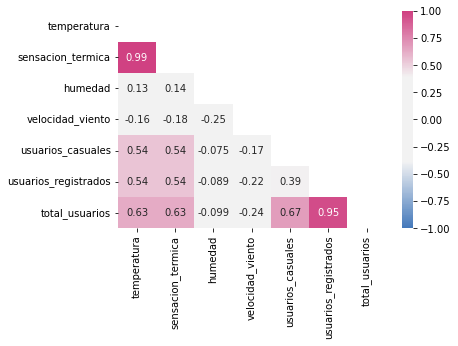

In [29]:
mask = np.triu(np.ones_like(df_numericas.corr(), dtype = np.bool_))

cmap = sns.diverging_palette(250, 349, sep=100, as_cmap=True)

sns.heatmap(df_numericas.corr(), 
           cmap = cmap, 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

Vemos relaciones entre temperatura y sensación térmica, por lo que decidimos quitar sensación térmica.

In [30]:
df.drop('sensacion_termica', axis = 1, inplace = True)

### Variables respuestas.

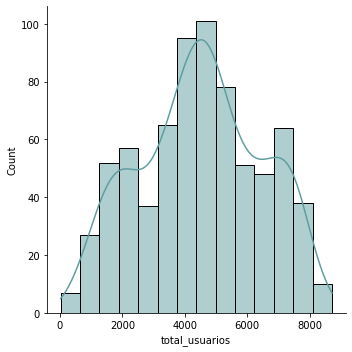

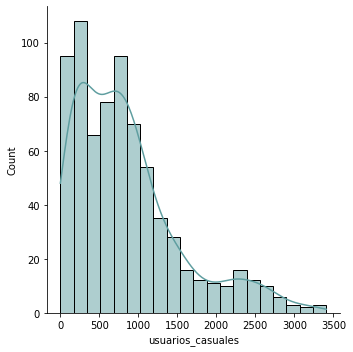

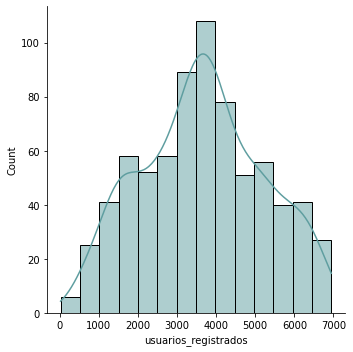

In [31]:
lista_columnas = ['total_usuarios','usuarios_casuales','usuarios_registrados']

for col in lista_columnas:
    sns.displot(df[col], kde=True, color="cadetblue");

Visualmente no se aprecia normalidad en ninguna de las tres columnas.

In [32]:
for col in lista_columnas:
    print(f'La columna {col}, tiene el p-valor {kstest(df[col], "norm")[-1]}')

La columna total_usuarios, tiene el p-valor 0.0
La columna usuarios_casuales, tiene el p-valor 0.0
La columna usuarios_registrados, tiene el p-valor 0.0


No son datos normales.

In [33]:
for col in lista_columnas:
    print(f'La columna {col}, tiene el siguiente curtosis {kurtosistest(df[col])[-1]}')

La columna total_usuarios, tiene el siguiente curtosis 5.0523461031270565e-15
La columna usuarios_casuales, tiene el siguiente curtosis 2.2074861509736936e-06
La columna usuarios_registrados, tiene el siguiente curtosis 4.657657548695374e-10


Tenemos platicurtosis en los tres casos.

In [34]:
for col in lista_columnas:
    print(f'La columna {col}, tiene el siguiente skew {df[col].skew()}')

La columna total_usuarios, tiene el siguiente skew -0.04958060487648213
La columna usuarios_casuales, tiene el siguiente skew 1.2663277435764353
La columna usuarios_registrados, tiene el siguiente skew 0.0412110579102227


La columna más sesgada es la de usuarios_casuales  (hacia la derecha). El resto no está muy sesgado.

### Guardamos los archivos para ML

Creamos los tres dataframes para hacer los métodos de ML.

In [35]:
df_casuales = df.drop(['fecha','registro','usuarios_registrados','total_usuarios'], axis=1)
df_casuales.to_pickle('../datos_finales/archivo_casual.pkl')

In [36]:
df_regis = df.drop(['fecha','registro','usuarios_casuales','total_usuarios'], axis=1)
df_regis.to_pickle('../datos_finales/archivo_registrados.pkl')

In [37]:
df_total = df.drop(['fecha','registro','usuarios_registrados','usuarios_casuales'], axis=1)
df_total.to_pickle('../datos_finales/archivo_total.pkl')